<a href="https://colab.research.google.com/github/sangeethapk/AI-ML/blob/main/Assaignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [66]:
data=pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
 #drop column sex
 data.drop('sex',axis=1,inplace=True)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [69]:
data.duplicated().sum()

np.int64(1)

In [70]:
data.drop_duplicates(inplace=True)

In [71]:
data.duplicated().sum()

np.int64(0)

In [72]:
data.isnull().sum()

,0
age,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [73]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [74]:
data.select_dtypes("number").skew()

,0
age,0.054781
bmi,0.283914
children,0.937421
charges,1.515391


<Axes: >

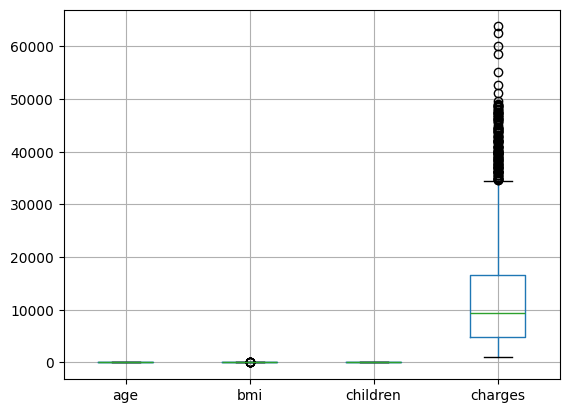

In [75]:
data.boxplot()


In [76]:
cat=data.select_dtypes("object").columns
cat

Index(['smoker', 'region'], dtype='object')

In [77]:
numeric_cols=data.select_dtypes("number").columns
numeric_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [78]:
cat=data.select_dtypes("object").columns
for i in cat:
  print(data[i].value_counts())
  print()

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



<Axes: >

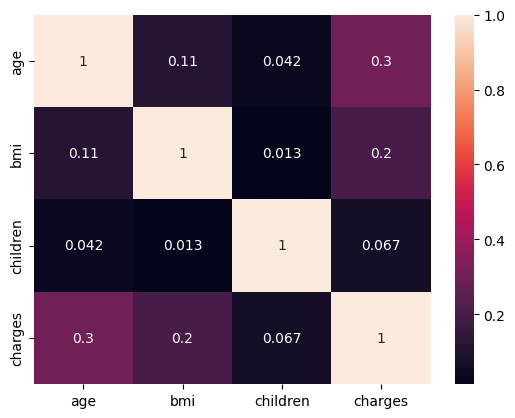

In [79]:
corr=data.select_dtypes("number").corr()
sns.heatmap(corr,annot=True)

In [80]:
#feature encoding for
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['smoker']=le.fit_transform(data['smoker'])
data

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,southwest,16884.92400
1,18,33.770,1,0,southeast,1725.55230
2,28,33.000,3,0,southeast,4449.46200
3,33,22.705,0,0,northwest,21984.47061
4,32,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,northwest,10600.54830
1334,18,31.920,0,0,northeast,2205.98080
1335,18,36.850,0,0,southeast,1629.83350
1336,21,25.800,0,0,southwest,2007.94500


In [81]:
#encode region with onehotencoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
region_encoded=ohe.fit_transform(data[['region']])

# Get encoded column names
encoded_columns = ohe.get_feature_names_out(['region'])

# Create a new DataFrame with encoded columns
encoded_df = pd.DataFrame(region_encoded.toarray(), columns=encoded_columns)

#combine with numeric column
final_data=pd.concat([encoded_df,data.select_dtypes("number")],axis=1)
final_data.head()


,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,1.0,16884.92400
1,0.0,0.0,1.0,0.0,18.0,33.770,1.0,0.0,1725.55230
2,0.0,0.0,1.0,0.0,28.0,33.000,3.0,0.0,4449.46200
3,0.0,1.0,0.0,0.0,33.0,22.705,0.0,0.0,21984.47061
4,0.0,1.0,0.0,0.0,32.0,28.880,0.0,0.0,3866.85520


In [82]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region_northeast  1337 non-null   float64
 1   region_northwest  1337 non-null   float64
 2   region_southeast  1337 non-null   float64
 3   region_southwest  1337 non-null   float64
 4   age               1337 non-null   float64
 5   bmi               1337 non-null   float64
 6   children          1337 non-null   float64
 7   smoker            1337 non-null   float64
 8   charges           1337 non-null   float64
dtypes: float64(9)
memory usage: 94.2 KB


In [83]:
final_data.isnull().sum()

,0
region_northeast,1
region_northwest,1
region_southeast,1
region_southwest,1
age,1
bmi,1
children,1
smoker,1
charges,1


In [84]:
#drop row with null value
final_data.dropna(inplace=True)

In [85]:
x=final_data.drop("charges",axis=1)#feature
y=final_data["charges"]#
x

,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,smoker
0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,1.0
1,0.0,0.0,1.0,0.0,18.0,33.770,1.0,0.0
2,0.0,0.0,1.0,0.0,28.0,33.000,3.0,0.0
3,0.0,1.0,0.0,0.0,33.0,22.705,0.0,0.0
4,0.0,1.0,0.0,0.0,32.0,28.880,0.0,0.0
...,...,...,...,...,...,...,...,...
1332,0.0,1.0,0.0,0.0,52.0,44.700,3.0,0.0
1333,1.0,0.0,0.0,0.0,50.0,30.970,3.0,0.0
1334,0.0,0.0,1.0,0.0,18.0,31.920,0.0,0.0
1335,0.0,0.0,0.0,1.0,18.0,36.850,0.0,0.0


In [86]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x)

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred=model1.predict(x_test)

In [90]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr_testscore=r2_score(y_test,model1.predict(x_test))
lr_trainscore=r2_score(y_train,model1.predict(x_train))

In [91]:
lr_mae=mean_absolute_error(y_test,y_pred)
lr_mse=mean_squared_error(y_test,y_pred)


In [92]:
lr_testscore,lr_trainscore,lr_mae,lr_mse

(0.7942292775903637,
 0.7294158900737241,
 4135.8882526831785,
 34962656.222832836)

Ridge

In [96]:
from sklearn.linear_model import Ridge
model2 = Ridge()
model2.fit(x_train, y_train)
y_pred=model2.predict(x_test)
ridge_testscore=r2_score(y_test,y_pred)
ridge_trainscore=r2_score(y_train,model2.predict(x_train))


In [93]:
ridge_mae=mean_absolute_error(y_test,y_pred)

In [94]:
ridge_mse=mean_squared_error(y_test,y_pred)

In [97]:
ridge_testscore,ridge_trainscore,ridge_mae,ridge_mse

(0.794086415642654, 0.7294151170993703, 4135.8882526831785, 34962656.222832836)

XGBRegressor

In [108]:
from xgboost import XGBRegressor
model4 = XGBRegressor()
model4.fit(x_train, y_train)
y_pred=model4.predict(x_test)
x_score=r2_score(y_test,y_pred)
x_trainscore=r2_score(y_train,model4.predict(x_train))

In [109]:
x_mae=mean_absolute_error(y_test,y_pred)
x_mse=mean_squared_error(y_pred,y_test)

RandomForestResgressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor()
model5.fit(x_train, y_train)
y_pred=model5.predict(x_test)
tree_score=r2_score(y_test,y_pred)
tree_trainscore=r2_score(y_train,model5.predict(x_train))
tree_mae=mean_absolute_error(y_test,y_pred)
tree_mse=mean_squared_error(y_test,y_pred)
tree_score,tree_trainscore,tree_mae,tree_mse

(0.8537749493239484, 0.9752243542812415, 2723.2675146, 24845206.927813586)

GradientBoostingRegressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)
y_pred=model3.predict(x_test)
g_testscore=r2_score(y_test,y_pred)
g_trainscore=r2_score(y_train,model3.predict(x_train))

In [101]:
g_mae=mean_absolute_error(y_test,y_pred)

In [100]:
g_mse=mean_squared_error(y_test,y_pred)

In [102]:
g_testscore,g_trainscore,g_mae,g_mse

(0.8812044546758574, 0.8971024634605, 2518.936214614592, 20184639.30793611)

In [110]:
pd.DataFrame({"model":["linear","ridge","gradient","xgboost","Random forest"],"r2_testscore":[lr_testscore,ridge_testscore,g_testscore,x_score,tree_score],"r2_train score":[lr_trainscore,ridge_trainscore,g_trainscore,x_trainscore,tree_trainscore],"mae":[lr_mae,ridge_mae,g_mae,x_mae,tree_mae],"mse":[lr_mse,ridge_mse,g_mse,x_mse,tree_mse]})

,model,r2_testscore,r2_train score,mae,mse
0,linear,0.794229,0.729416,4135.888253,3.496266e+07
1,ridge,0.794086,0.729415,4135.888253,3.496266e+07
2,gradient,0.881204,0.897102,2518.936215,2.018464e+07
3,xgboost,0.828696,0.995482,3144.515185,2.910638e+07
4,Random forest,0.853775,0.975224,2723.267515,2.484521e+07


##Interpretation
Best Model: Gradient Boosting

Why Gradient Boosting is the Best:



*  Highest R² on test set → 0.8812: Best generalization.
*  Lowest MAE → 2518.94: Lowest average prediction error.
*  Lowest MSE → 20.18M: Lowest squared error = fewer large mistakes.
*  Balanced Train/Test R² (0.8971 train vs. 0.8812 test) → No overfitting.

Comments on Other Models:

Random Forest: Strong model but slightly worse than Gradient Boost on all metrics.

XGBoost: High train R² (0.995) suggests overfitting. Test R² is lower than Gradient Boost.

Linear & Ridge: Weakest models here — lowest R², highest errors.
